## Distribution

## 1. Read Folder

In [450]:
name = "amya"

In [451]:
print(name)

amya


In [452]:
name= name + " l3yan" 

In [454]:
print(name)

amya l3yan


In [262]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [263]:
DATASET_PATH = "../dataset/"
APPLE_PATH = DATASET_PATH + "Apple"
GRAPE_PATH = DATASET_PATH + "Grape"

In [383]:
def generate_random_hexa_color_codes(number_of_colors_to_generate):
    color_codes = []
    for i in range(number_of_colors_to_generate):
        color_codes.append("#" + ("%06x" % random.randint(0, 0xFFFFFF)))
    return color_codes


In [386]:
def list_files_and_folders_with_type(path):
    result = []

    try:
        # Get the list of files and folders in the specified path
        items = os.listdir(path)

        # Iterate through each item
        for item in items:
            item_path = os.path.join(path, item)

            # Check if the item is a file or a folder
            if os.path.isfile(item_path):
                result.append((item, "file"))
            elif os.path.isdir(item_path):
                result.append((item, "folder"))
            else:
                result.append((item, "unknown"))

    except FileNotFoundError:
        print(f"The specified path '{path}' does not exist.")

    return result


In [431]:
def build_image_stats(paths):
    stats = {}

    for path in paths:
        components = path.split('/')
        current_dict = stats

        for component in components[:-2]:
            current_dict = current_dict.setdefault(component, {})

        category = components[-2]
        current_dict[category] = current_dict.get(category, 0) + 1

    return stats

In [387]:
def load_images_from_directory(directory_path):
    images = os.listdir(directory_path)
    images = [image for image in images if image.endswith(".JPG")]
    return images

In [388]:
def remove_prefix(path, prefix):
    return path[len(prefix):] if path.startswith(prefix) else path

In [445]:
def scrap_images(parentFolder, root_path):
    sub_images = []
    all_images = []
    items_list = list_files_and_folders_with_type(root_path)
    # Print the resulting list of tuples
    counter = 0
    for item in items_list:
        if item[1] == "folder":
            
            newPath = os.path.join(root_path, item[0])
         
            all_images = np.append(all_images, scrap_images(newPath, newPath))
            # print("Total images: ", len(load_images_from_directory(os.path.join(root_path, item[0]))))
        else:
            all_images= np.append(all_images, remove_prefix(os.path.join(root_path, item[0]), "../"))
    return all_images

In [460]:
all_images = scrap_images(APPLE_PATH, APPLE_PATH)
# all_images = scrap_images(DATASET_PATH, DATASET_PATH)


print(f"Total of all images: {len(all_images)}")

Total of all images: 3164


In [461]:
image_stats = build_image_stats(all_images)
print(image_stats)
print(len(image_stats))
if len(image_stats) == 1:
    firstKey = next(iter(image_stats))
    print(len(image_stats[firstKey]), image_stats[firstKey].keys())
    if len(image_stats[firstKey]) == 1:
        image_stats = image_stats[firstKey]

print(image_stats)

{'dataset': {'Apple': {'Apple_healthy': 1640, 'Apple_scab': 629, 'Apple_Black_rot': 620, 'Apple_rust': 275}}}
1
1 dict_keys(['Apple'])
{'Apple': {'Apple_healthy': 1640, 'Apple_scab': 629, 'Apple_Black_rot': 620, 'Apple_rust': 275}}


In [462]:
def print_pretty(data, level=0):
    for key, value in data.items():
        print('\t' * level + str(key) + (" : " + str(value) if not isinstance(value, dict) else ""))
        if isinstance(value, dict):
            print_pretty(value, level + 1)

In [463]:
print_pretty(image_stats)

Apple
	Apple_healthy : 1640
	Apple_scab : 629
	Apple_Black_rot : 620
	Apple_rust : 275


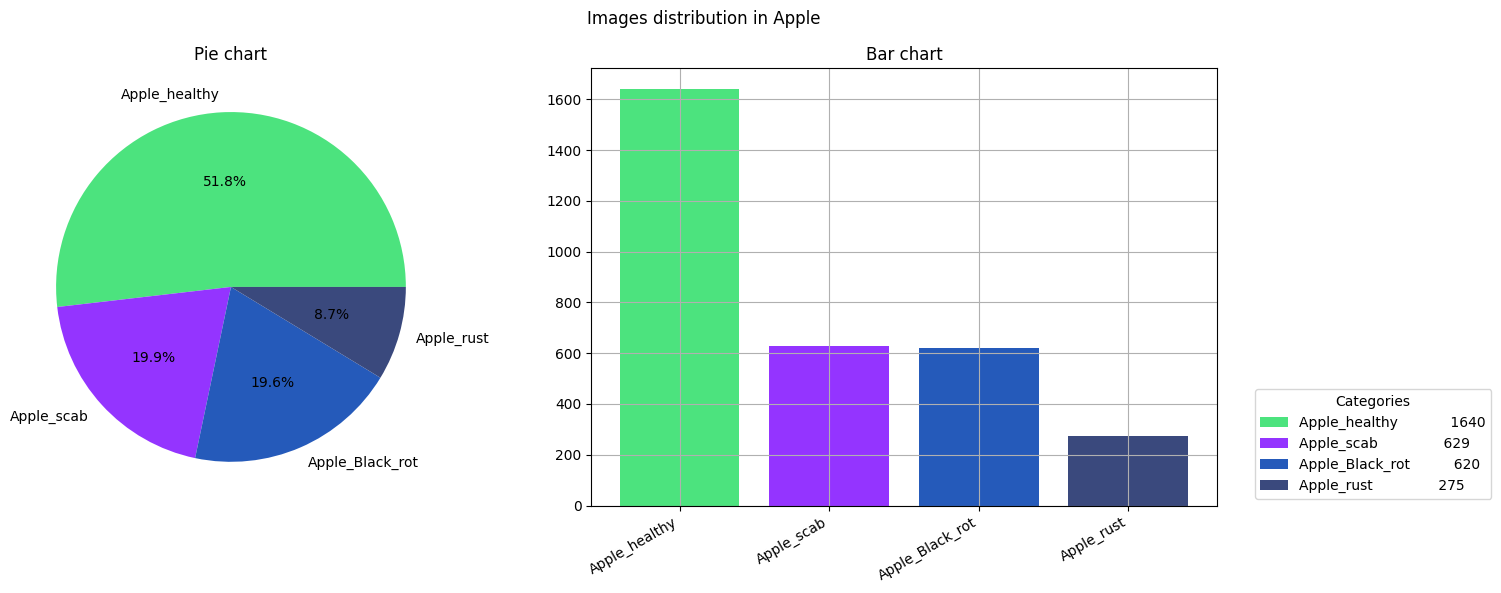

In [464]:
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

def plot_image_stats(_image_stats):
    flattened_stats = flatten_dict(image_stats)
    categories = list(flattened_stats.keys())
    counts = list(flattened_stats.values())

    colors = generate_random_hexa_color_codes(len(categories))

    plt.figure(figsize=(16, 6))

    # hide_parent_folder
    title = next(iter(_image_stats))
    plt.suptitle(f"Images distribution in {title}")

    # Pie chart
    plt.subplot(1, 2, 1)

    pie = plt.pie(counts, labels=categories, autopct="%1.1f%%", colors=colors)
    plt.title("Pie chart")

    # Bar chart
    plt.subplot(1, 2, 2)

    bars = plt.bar(categories, counts, color=colors)
    plt.xticks(rotation=30, ha="right")

    plt.grid(True)
    plt.title("Bar chart")

    # Add legends
    plt.legend(bars, [f"{c.ljust(25)}{counts[i]}" for (i,c) in enumerate(categories)], title="Categories", bbox_to_anchor=(1.05, 0), loc='lower left')

    plt.tight_layout()
    plt.savefig(f"./{title}_distribution8", bbox_inches='tight')
    plt.show()



plot_image_stats(image_stats)



# 